In [1]:
# http://twiecki.github.io/blog/2013/09/12/bayesian-glms-1/

In [2]:
from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt
import spacepy.plot as spp

/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:

size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

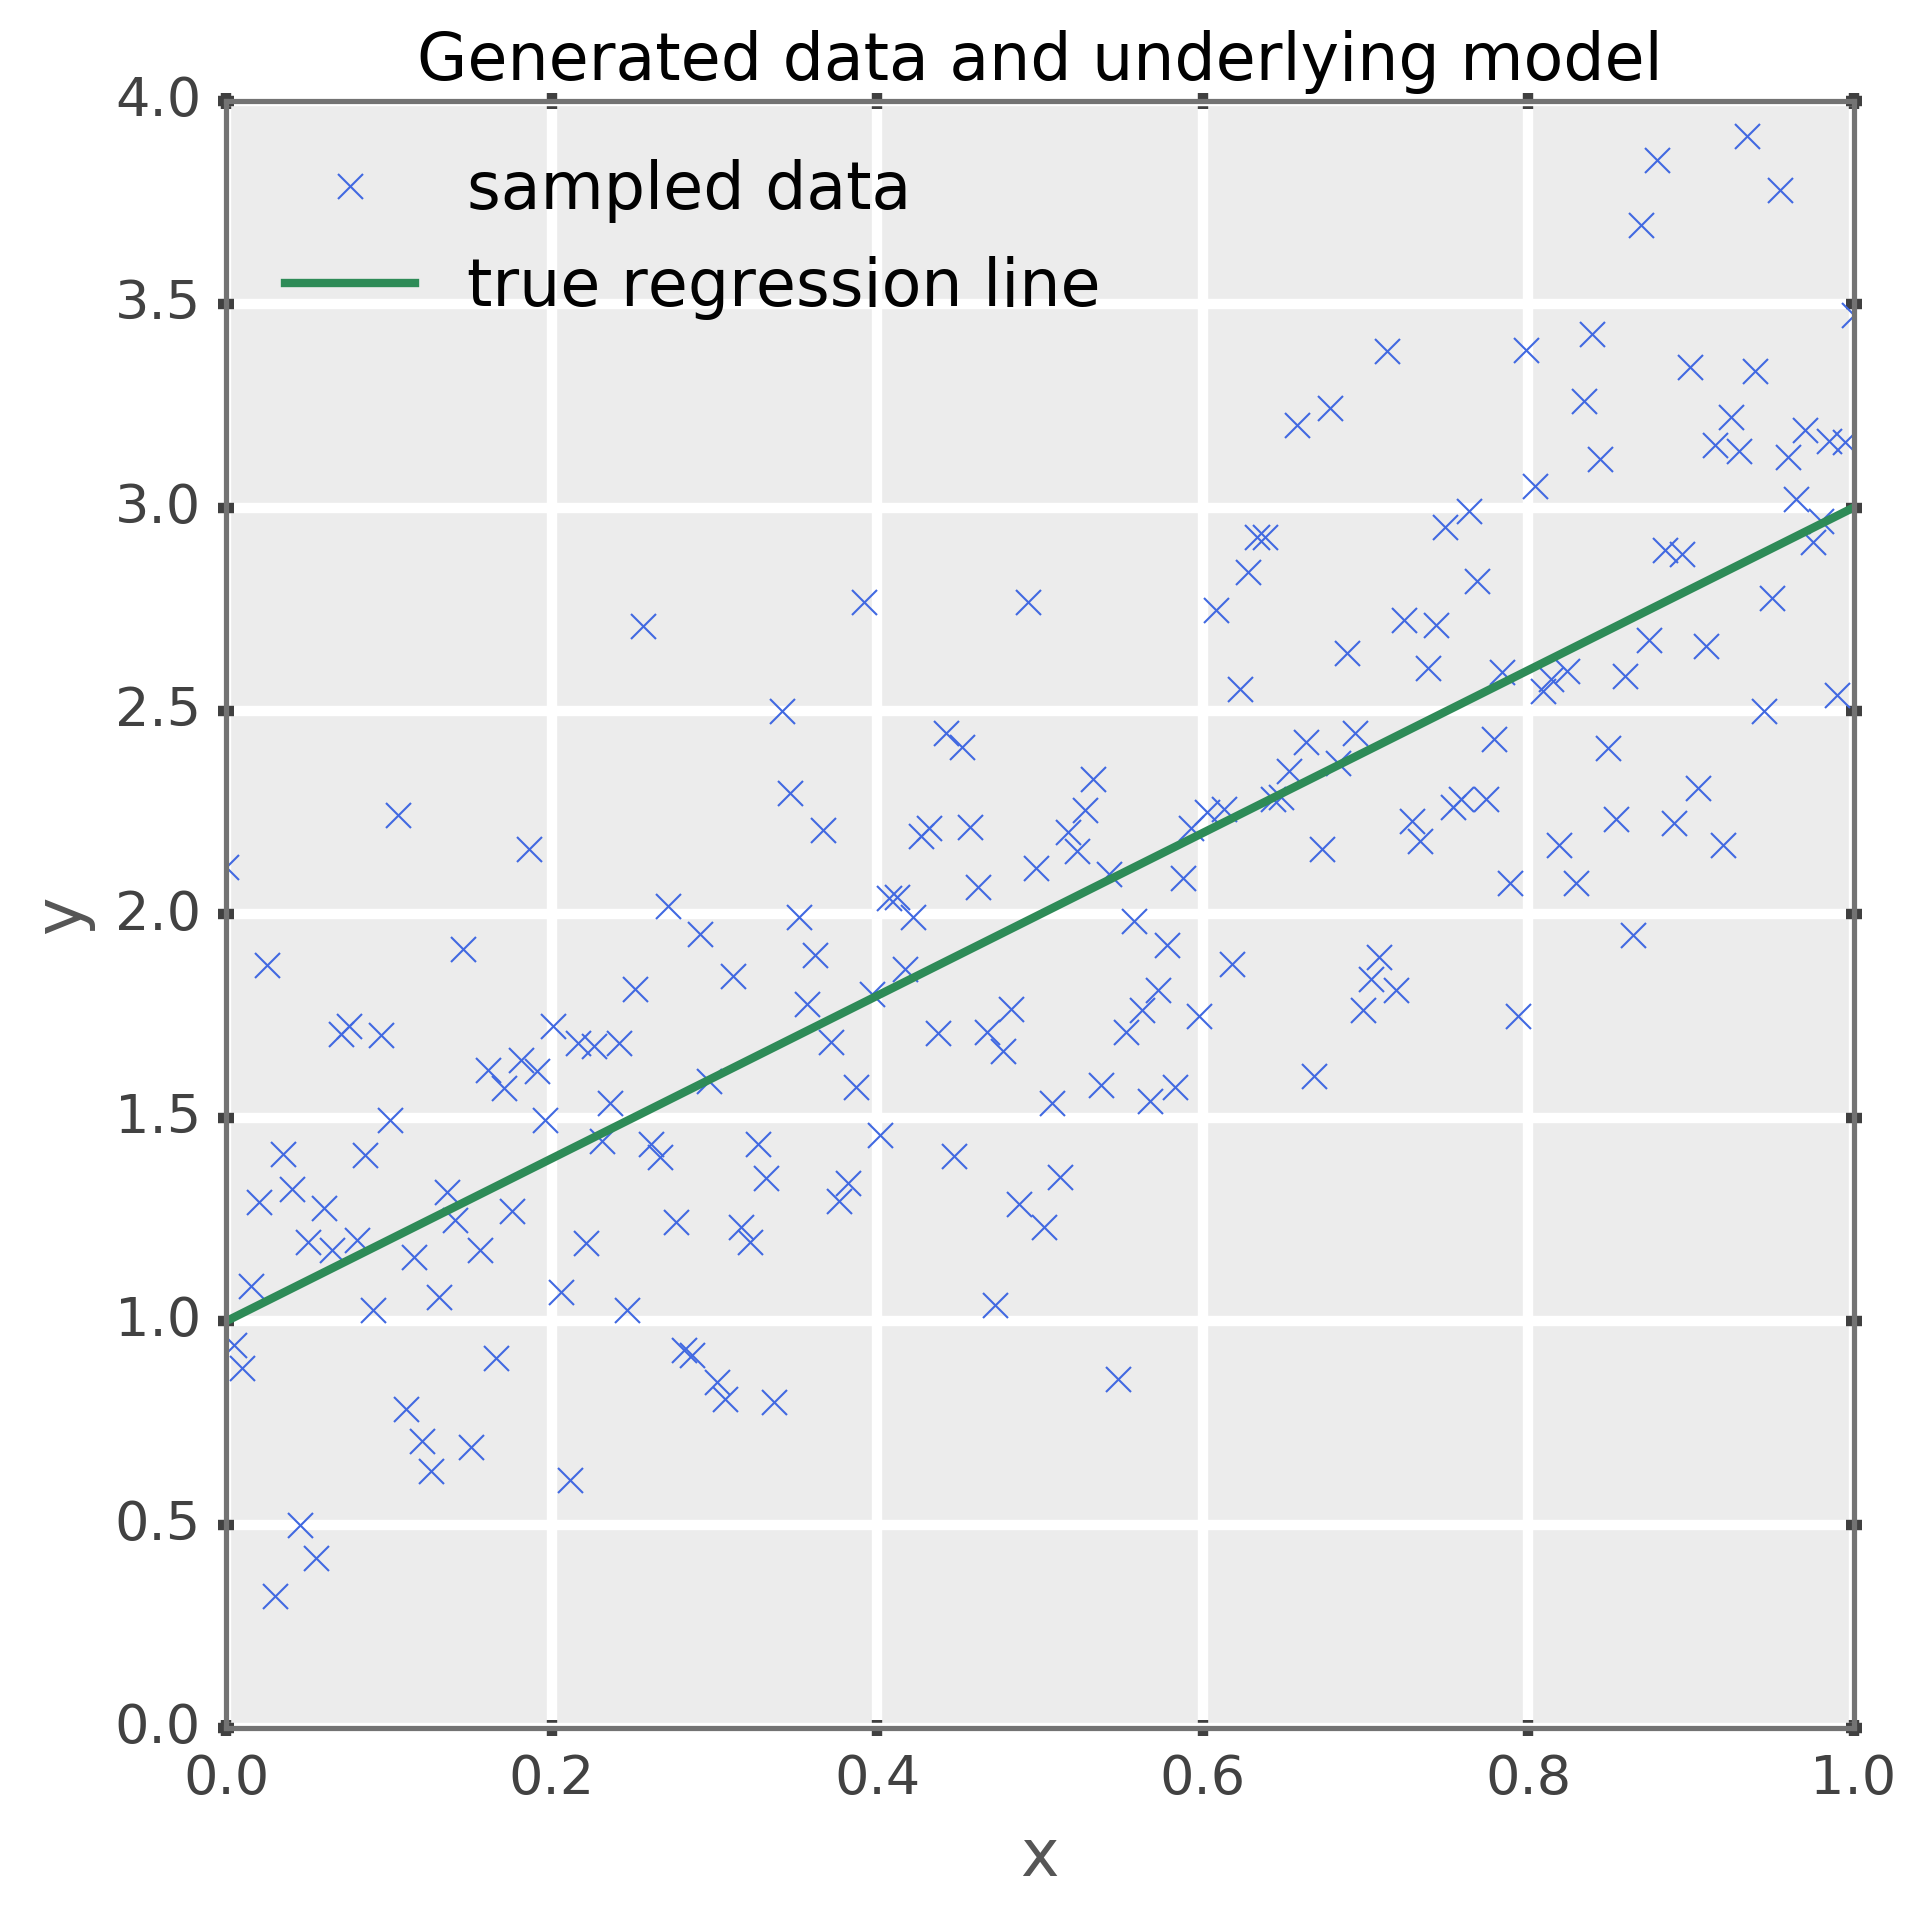

In [4]:

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

In [5]:
with Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = Uniform('sigma', 0, 20)
    intercept = Normal('Intercept', 0, sd=20)
    x_coeff = Normal('x', 0, sd=20)
    
    # Define likelihood
    likelihood = Normal('y', mu=intercept + x_coeff * x, sd=sigma, observed=y)
    
    # Inference!
    start = find_MAP() # Find starting value by optimization
    step = NUTS(state=start) # Instantiate MCMC sampling algorithm
    trace = sample(2000, step, start=start, progressbar=True) # draw 2000 posterior samples using NUTS sampling

Applied interval-transform to sigma and added transformed sigma_interval_ to model.
 [-----------------100%-----------------] 2000 of 2000 complete in 4.4 sec

In [6]:

with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and 
    # and all its parameters are automatically added to our model.
    glm.glm('y ~ x', data)
    step = NUTS() # Instantiate MCMC sampling algorithm
    trace = sample(2000, step, progressbar=True) # draw 2000 posterior samples using NUTS sampling

Applied log-transform to sd and added transformed sd_log_ to model.
 [-----------------100%-----------------] 2000 of 2000 complete in 3.3 sec

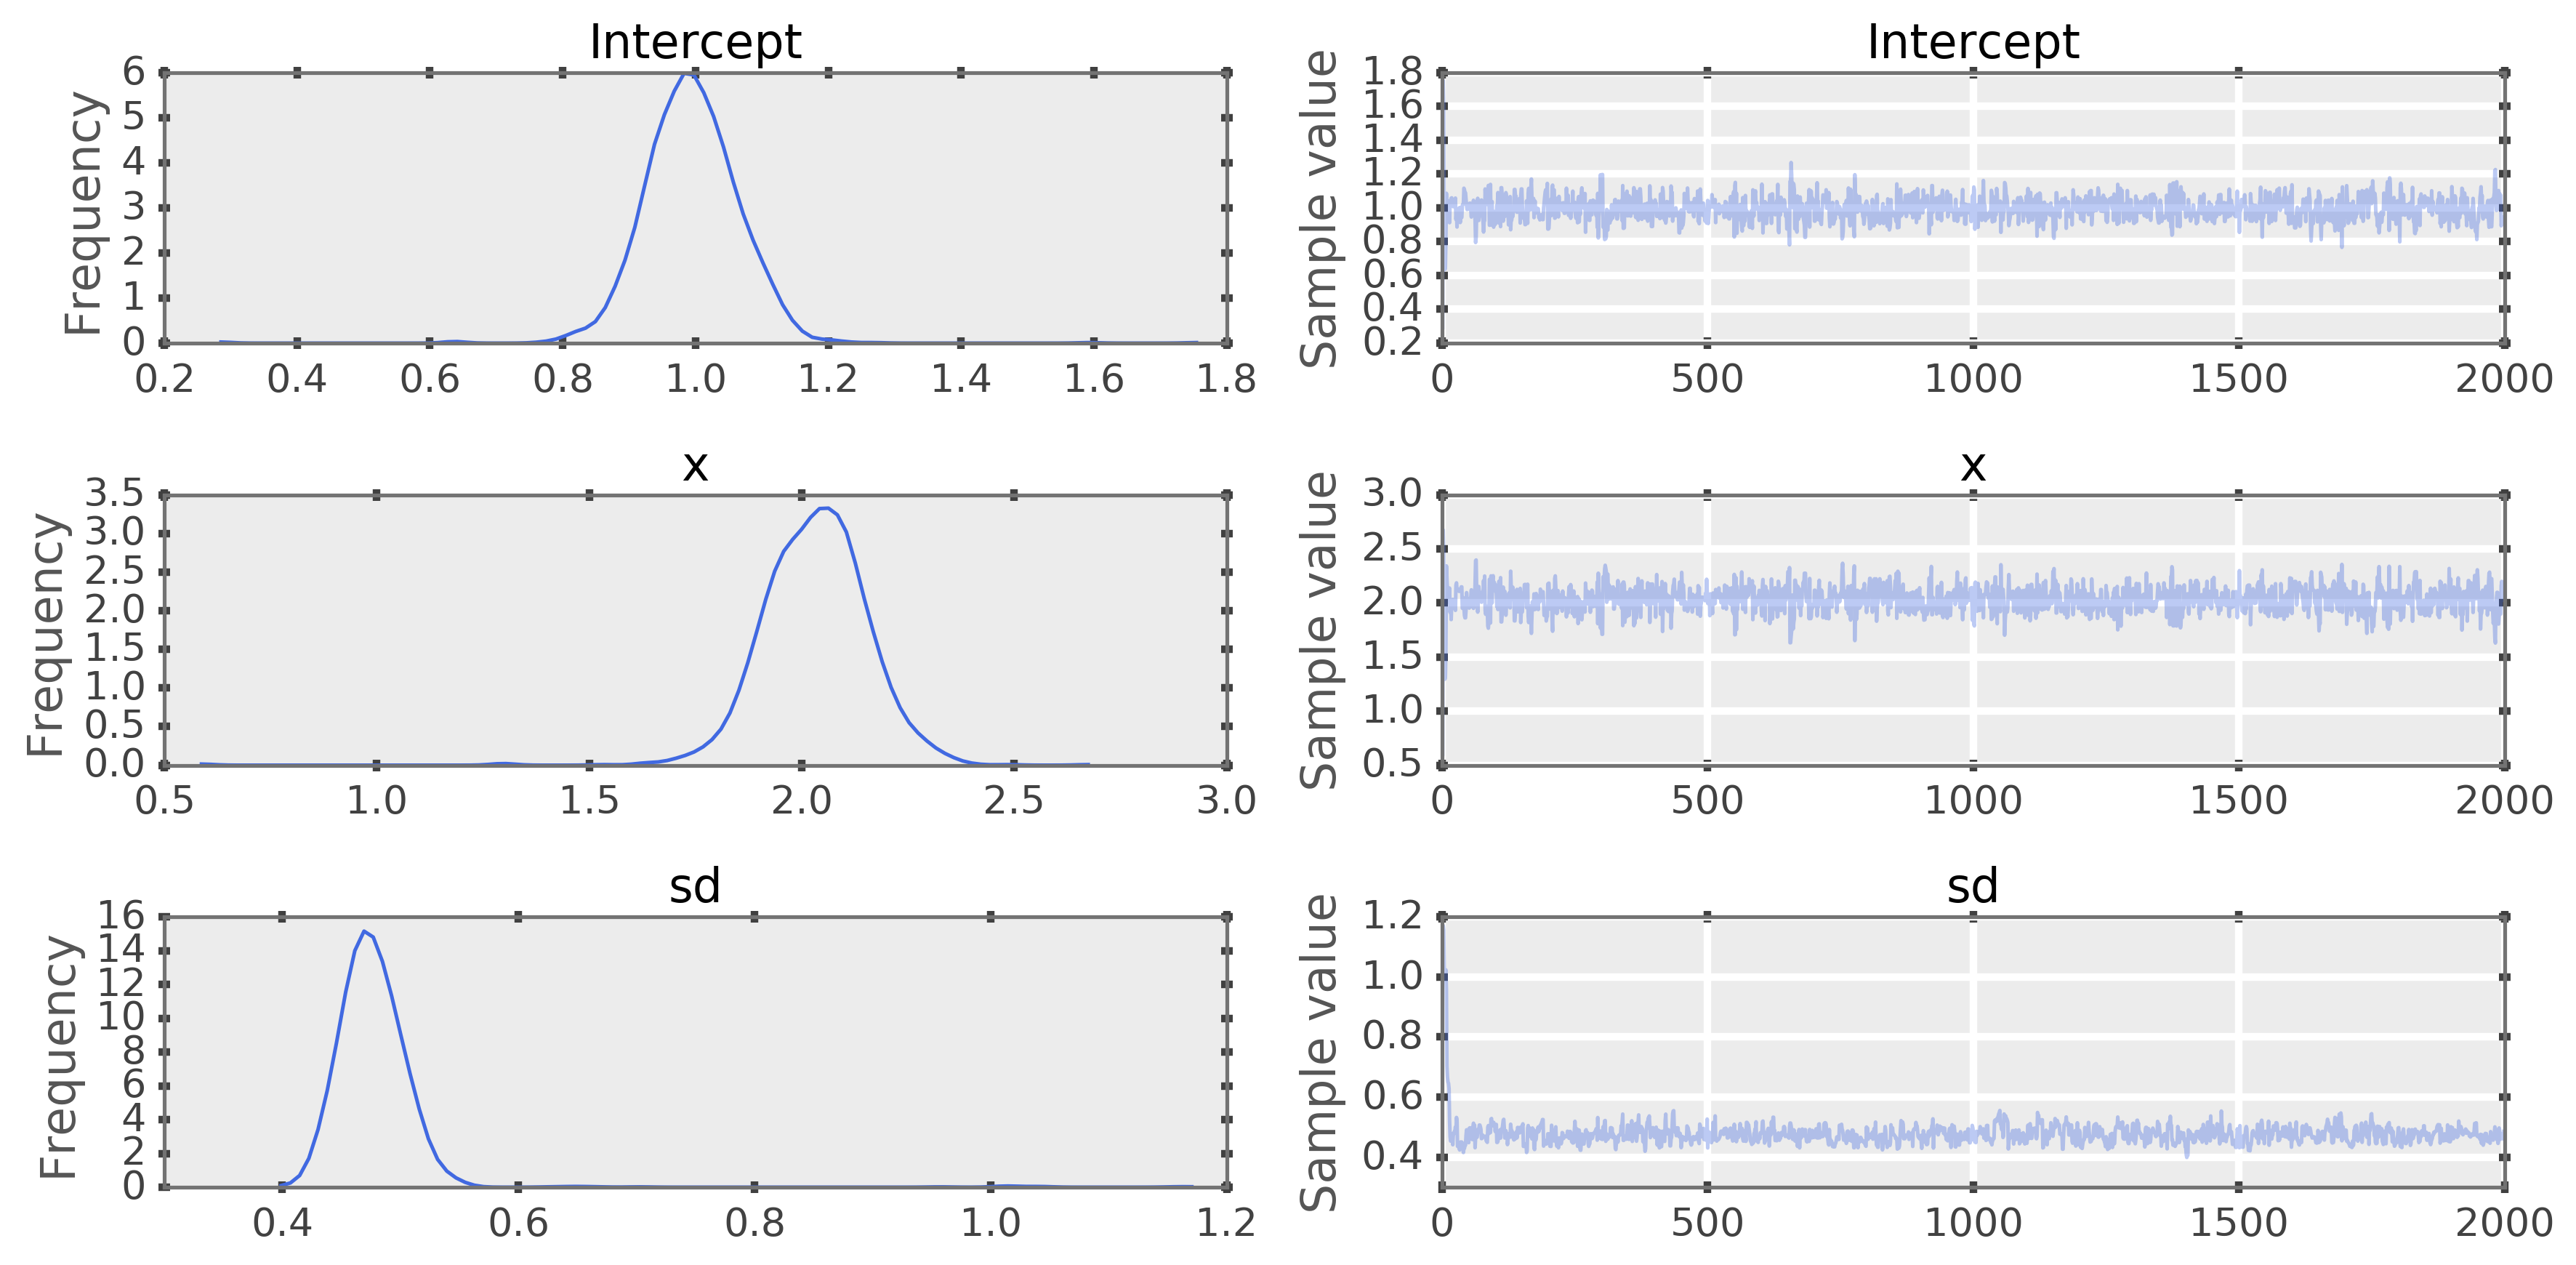

In [7]:
plt.figure(figsize=(7, 7))
traceplot(trace)
plt.tight_layout();


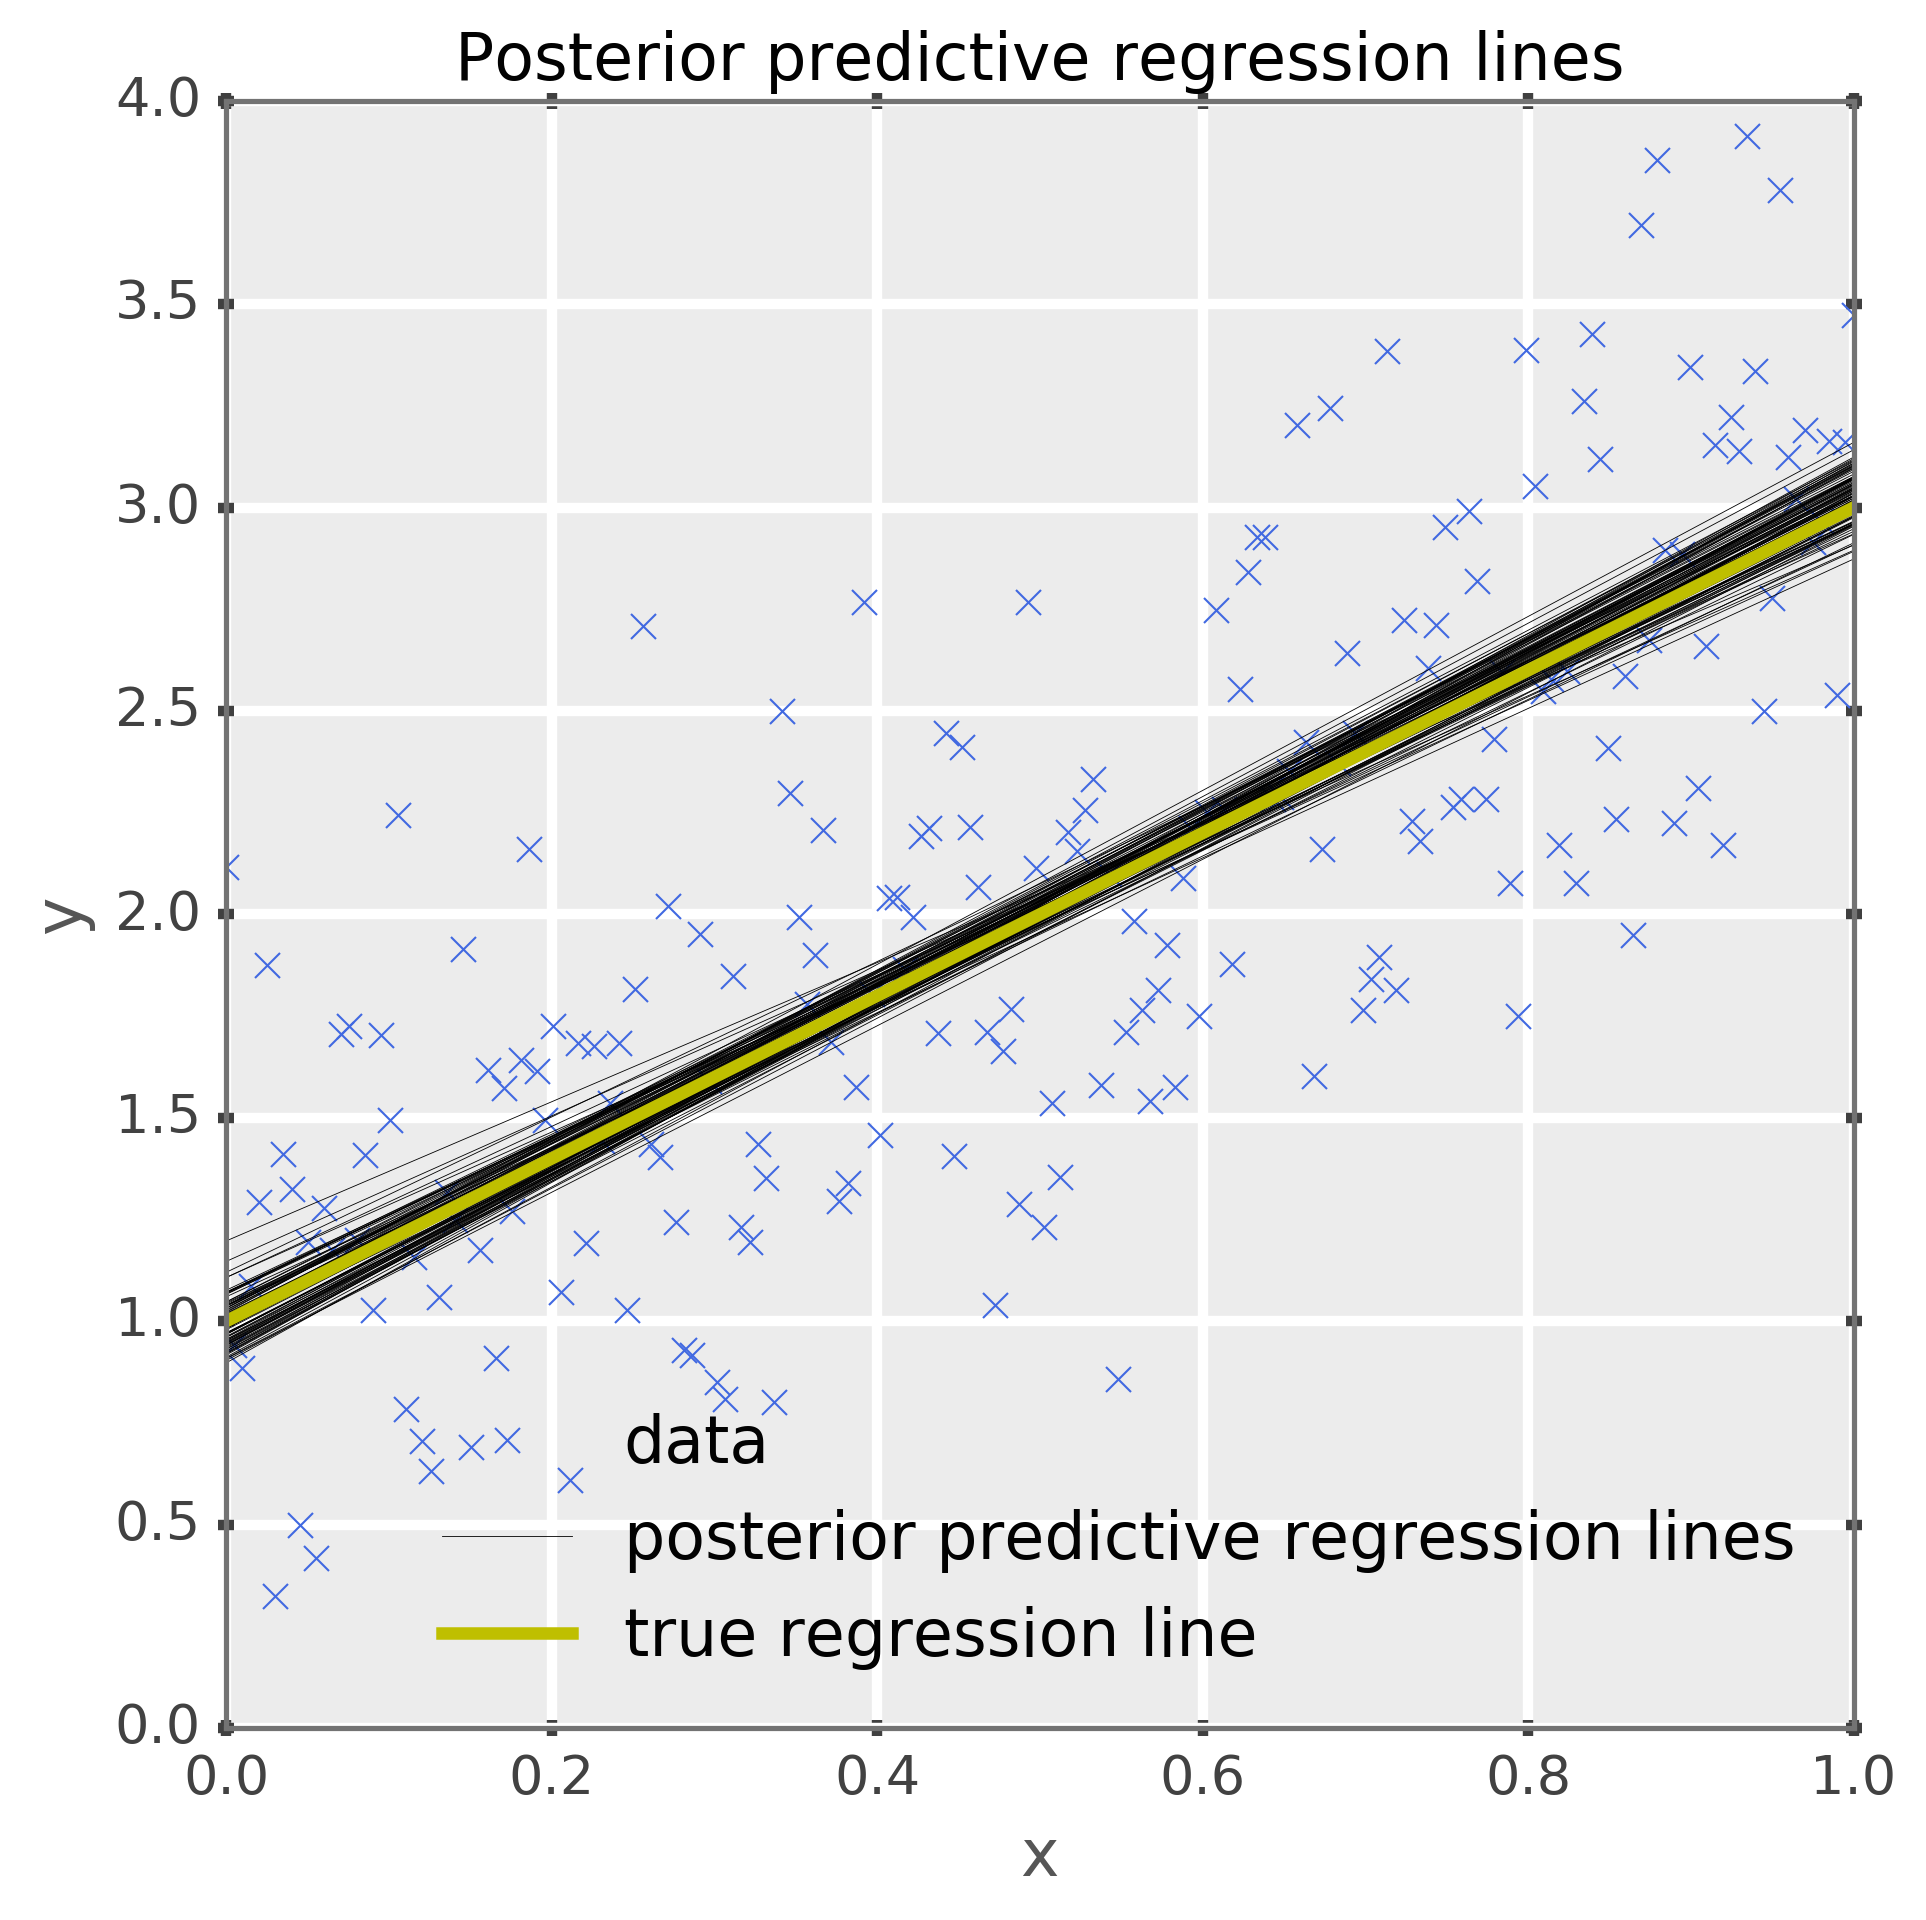

In [8]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
glm.plot_posterior_predictive(trace, samples=100, 
                              label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');